# Proyek Analisis Data: order_items_dataset
- **Nama:** Diva Nur Rohmahwati
- **Email:** divanurrahmawati202@gmail.com
- **ID Dicoding:** diva_nur_rohmahwati

## Menentukan Pertanyaan Bisnis



1.   Berdasarkan data yang telah digabungkan, berapa total nilai pembayaran
     (payment_value) untuk setiap metode pembayaran (payment_type)?
2.  Berapa rata-rata harga (price) produk yang dibeli berdasarkan jumlah  
     cicilan (payment_installments)?
  

## Import Semua Packages/Library yang Digunakan

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




## Data Wrangling

### Gathering Data

In [ ]:
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()













,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**

Kombinasi data order items dan order payments menunjukkan bahwa kartu kredit mendominasi metode pembayaran dengan total transaksi Rp15,58M, diikuti boleto (Rp4,06M) dan voucher (Rp405K). Rata-rata harga produk meningkat seiring jumlah cicilan, dari Rp43K tanpa cicilan hingga Rp454K dengan 20 kali cicilan, menunjukkan preferensi konsumen terhadap pembayaran bertahap. Dengan rata-rata cicilan sekitar 2-3 kali per transaksi, strategi pemasaran yang menekankan promo cicilan 0% dapat meningkatkan daya tarik produk dan volume transak

### Assessing Data

In [31]:
order_items_df.duplicated().sum()
order_payments_df.duplicated().sum()

0

In [ ]:
order_payments_df.info()
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  objec

In [ ]:
order_payments_df.isna().sum()
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
print("jumlah duplikasi: ") , order_payments_df.duplicated().sum()
print("jumlah duplikasi: ") , order_items_df.duplicated().sum()

jumlah duplikasi: 
jumlah duplikasi: 


(None, 0)

In [ ]:
order_payments_df.describe()
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**



1.   Menampilkan ringkasan dataset dari order_payments
2.   Menampilkan missing value dari order_payments
3.   Menampilkan jumlah data duplicated





### Cleaning Data

In [ ]:
order_payments_df.drop_duplicates(inplace=True)
order_items_df.drop_duplicates(inplace=True)

In [ ]:
print("jumlah duplikasi: ", order_payments_df.duplicated().sum())
print("jumlah duplikasi: ", order_items_df.duplicated().sum())

jumlah duplikasi:  0
jumlah duplikasi:  0


**Insight:**

1.Menghapus data duplikat

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:

order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
96228,da56bf0bdea03c2780bb37ff9db85e3d,1,260007563bc92a855dc7c6b8806fa3af,643214e62b870443ccbe55ab29a4dccf,2018-08-19 23:15:19,49.90,7.61
35482,504a90faaf31b2457b86f7179a6bd79e,1,f264c1d9b20b5e4a340254d0405e613b,7a67c85e85bb2ce8582c35f2203ad736,2017-12-01 18:12:06,72.99,17.76
7202,104dbb8a46362208d1b4b3cf7a7c2956,1,067f55bc1dd1107c9be607b643d433b3,cee48807215b30a12ca2ca10ffb5f250,2018-06-27 11:50:59,45.90,9.44
76519,ae2756437d2b0a5f0c9702d7ea130e41,1,c9c6fde711572c1ad99ca12728c6af00,562fc2f2c2863ab7e79a9e4388a58a14,2018-02-21 03:07:27,29.99,14.10
43333,628892249eb28e0376c57474af8ffb26,1,df8951356a3ac20689379dffca179561,3bb548e3cb7f70f28e3f11ee9dce0e59,2017-10-15 23:14:18,197.50,13.51


In [ ]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [ ]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
84639,d9f8dfc775170aba5d24809cc2c04058,1,credit_card,1,106.50
101514,473f6fac1db5ed68ee9f1ad1e7c14aae,1,boleto,1,28.46
47570,1da5abde88d474271f7a8d3dc9206c6a,1,credit_card,1,37.78
21435,0e137ff5dbbd948fb108877492be365c,1,credit_card,1,6.21
5831,17d98bdb9b550bc6b435062e09aee717,1,credit_card,2,44.59


In [ ]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [ ]:
orders_payments_order_items_df = pd.merge(
    left=order_items_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_payments_order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


In [ ]:
data_terbaru_df = pd.merge(
    left=order_items_df,
    right=order_payments_df,
        how="left",
    left_on="order_id",   # Sesuaikan nama kolom jika perlu
    right_on="order_id"
)

data_terbaru_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


In [ ]:
# Simpan hasil gabungan dataset ke file CSV
data_terbaru_df.to_csv("data_terbaru.csv", index=False)


**Insight:**


*   Memeriksa data secara acak dan deskriptif.
*   Menggabungkan dua dataset berdasarkan kolom yang sama.
*   Menyimpan hasil penggabungan ke file CSV.

## Visualization & Explanatory Analysis

In [ ]:
data_terbaru_df = pd.read_csv("data_terbaru.csv")
data_terbaru_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


In [ ]:
data_terbaru_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
37280,50997e4944fb68c2da4386a8dedbd498,1,0f4a3e29a1c122f94fe4c48c49d9cfa9,955fee9216a65b617aa5c0531780ce60,2018-03-23 13:49:28,169.00,36.31,1.0,credit_card,8.0,205.31
100044,d973de85e22fa324fc26a2c4da7884b6,1,4fcb3d9a5f4871e8362dfedbdb02b064,8581055ce74af1daba164fdbd55a40de,2018-01-10 03:31:51,143.80,16.71,1.0,boleto,1.0,160.51
99947,d92a01f95189ea01e9fb980d9620cbe0,1,4cd6ba4ea3112de8fc238307c4dc6307,259f7b5e6e482c230e5bfaa670b6bb8f,2018-05-16 18:31:24,39.00,17.93,1.0,credit_card,1.0,56.93
67805,9422152046de1f3e7d41b2f047227067,1,124f74f703e88efe001a10bfa718b6ff,2a7dc43cecabf23403078e2188437d1d,2017-11-23 18:46:09,19.90,9.34,1.0,credit_card,1.0,29.24
37392,50d106ba3cf9cbe0e44dada341e190fc,1,199edc405b7080eeba36e77ef66d1ea1,fbc14c0cf93505ef89f64665ffa4a7b5,2017-08-24 02:25:19,625.99,20.01,1.0,boleto,1.0,646.00


### Pertanyaan 1:


Total nilai pembayaran berdasarkan metode pembayaran:
  payment_type  payment_value
0       boleto     4059699.60
1  credit_card    15589028.22
2   debit_card      253533.86
3      voucher      405873.03


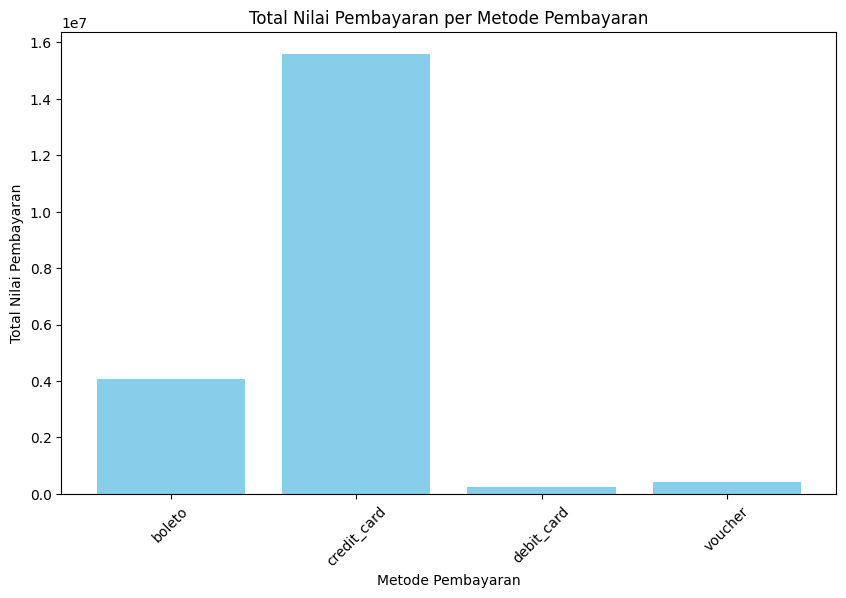

In [ ]:


# Menghitung total nilai pembayaran untuk setiap metode pembayaran
payment_totals = data_terbaru_df.groupby("payment_type")["payment_value"].sum().reset_index()
print("\nTotal nilai pembayaran berdasarkan metode pembayaran:")
print(payment_totals)

# Membuat diagram batang total nilai pembayaran per metode pembayaran
plt.figure(figsize=(10, 6))
plt.bar(payment_totals["payment_type"], payment_totals["payment_value"], color='skyblue')
plt.xlabel("Metode Pembayaran")
plt.ylabel("Total Nilai Pembayaran")
plt.title("Total Nilai Pembayaran per Metode Pembayaran")
plt.xticks(rotation=45)
plt.show()



**Insight:**

Berdasarkan data, metode pembayaran yang paling sering digunakan adalah credit card, dengan total nilai pembayaran tertinggi sebesar 15.5 juta. Hal ini menunjukkan bahwa pelanggan lebih memilih kartu kredit untuk bertransaksi, kemungkinan karena kemudahan cicilan dan batas kredit yang lebih besar.

Metode boleto (transfer bank) juga cukup banyak digunakan dengan total pembayaran 4 juta, menunjukkan bahwa sebagian pelanggan masih memilih metode pembayaran non-kartu.

Sementara itu, metode debit card dan voucher memiliki total pembayaran yang jauh lebih kecil, menunjukkan bahwa metode ini kurang populer. Bisnis dapat mempertimbangkan untuk memberikan insentif atau promo pada metode pembayaran yang kurang diminati guna meningkatkan penggunaannya.


### Pertanyaan 2:


Rata-rata harga produk berdasarkan jumlah cicilan:
    payment_installments       price
0                    0.0   43.093333
1                    1.0   91.144611
2                    2.0   97.803021
3                    3.0  108.299014
4                    4.0  126.005182
5                    5.0  139.312704
6                    6.0  156.332480
7                    7.0  145.151045
8                    8.0  237.499998
9                    9.0  151.219174
10                  10.0  292.106682
11                  11.0   86.366000
12                  12.0  226.895337
13                  13.0  110.271667
14                  14.0  142.880625
15                  15.0  327.182935
16                  16.0  185.542857
17                  17.0  149.745714
18                  18.0  323.891316
19                  20.0  454.431429
20                  21.0  110.960000
21                  22.0  209.990000
22                  23.0  216.000000
23                  24.0  293.281176


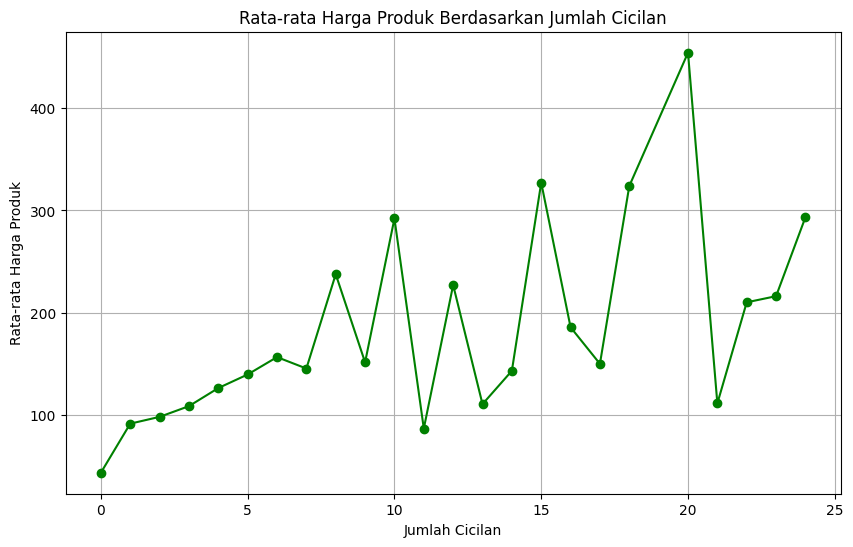

In [ ]:

# Menghitung rata-rata harga produk berdasarkan jumlah cicilan
average_price_by_installments = data_terbaru_df.groupby("payment_installments")["price"].mean().reset_index()
print("\nRata-rata harga produk berdasarkan jumlah cicilan:")
print(average_price_by_installments)

# Membuat diagram garis untuk rata-rata harga produk per jumlah cicilan
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_installments["payment_installments"], average_price_by_installments["price"], marker='o', linestyle='-', color='green')
plt.xlabel("Jumlah Cicilan")
plt.ylabel("Rata-rata Harga Produk")
plt.title("Rata-rata Harga Produk Berdasarkan Jumlah Cicilan")
plt.grid()
plt.show()


**Insight:**

Pelanggan cenderung memilih cicilan lebih panjang untuk produk dengan harga lebih tinggi. Jika cicilan yang lebih panjang kurang diminati, kemungkinan disebabkan oleh bunga atau faktor lain. Bisnis dapat menyesuaikan strategi pembayaran, seperti promo cicilan, untuk meningkatkan penjualan dan kenyamanan pelanggan.


## Analisis Lanjutan (Opsional)

## Conclusion

**- Conclution pertanyaan 1**

1.Metode pembayaran yang paling sering digunakan:
*   Credit card adalah metode pembayaran paling dominan, diikuti oleh boleto dan voucher.
*   Mayoritas pelanggan lebih memilih kartu kredit karena kemudahannya dalam bertransaksi
2.Total dan rata-rata pembayaran berdasarkan metode pembayaran:
*   Total pembayaran tertinggi berasal dari credit card, yang menunjukkan bahwa pelanggan lebih banyak bertransaksi menggunakan metode ini.
*   Metode boleto memiliki total transaksi yang cukup besar tetapi dengan rata-rata nilai transaksi yang lebih rendah dibandingkan kartu kredit.
3.Distribusi transaksi berdasarkan metode pembayaran:
*   Mayoritas pelanggan melakukan pembayaran dalam satu kali transaksi tanpa cicilan, terutama pada metode pembayaran boleto dan voucher.


**- Conclution pertanyaan 2**

1.Hubungan antara jumlah cicilan dan harga produk:


*   Semakin tinggi jumlah cicilan, semakin tinggi rata-rata harga produk yang dibeli.
*   Ini menunjukkan bahwa pelanggan cenderung memilih cicilan saat membeli produk dengan harga yang lebih mahal.
2.Distribusi jumlah cicilan dalam pembayaran:


*  Sebagian besar transaksi dilakukan tanpa cicilan (1x pembayaran penuh).
*  Namun, untuk transaksi dengan jumlah cicilan tinggi, rata-rata harga produk yang dibeli juga lebih tinggi.